# Crypto - Bitcoin & Ether

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

This func will get us the information, price history of btc and eth cryptocurrencies. 

Args-example: `symbol = "btc"`

In [3]:
def get_historic_prices(symbol, exchange="bitstamp", after="2021-12-25"):
  url = f"https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc"

  res = requests.get(url, params={
    "period": "3600",
    "after": str(int(pd.Timestamp(after).timestamp()))
  })

  res.raise_for_status()
  data = res.json()
  
  df = pd.DataFrame(data["result"]["3600"], columns=[
    "CloseTime", "OpenPrice", "HighPrice", "LowPrice", "ClosePrice", "Volume", "NA"
  ])

  # Parse date
  df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
  df.set_index('CloseTime', inplace=True)

  return df


In [4]:
btc = get_historic_prices("btc")
eth = get_historic_prices("eth")

## Bitcoin

In [11]:
btc.shape

(40, 6)

In [5]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-12-25 00:00:00,50775.12,50910.00,50522.45,50841.48,73.487484,3.725840e+06
2021-12-25 01:00:00,50857.42,51096.89,50656.08,51083.18,55.022424,2.802955e+06
2021-12-25 02:00:00,51093.58,51123.34,50884.87,51025.94,11.827068,6.035132e+05
2021-12-25 03:00:00,51019.33,51160.21,50817.37,50817.37,9.747875,4.971601e+05
2021-12-25 04:00:00,50817.37,50978.99,50733.11,50883.32,6.276232,3.191838e+05


<AxesSubplot:xlabel='CloseTime'>

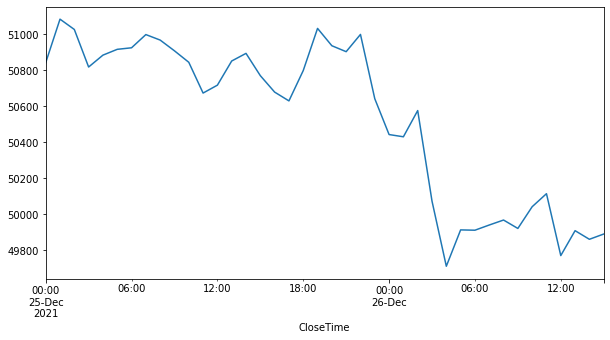

In [6]:
btc["ClosePrice"].plot(figsize=(10, 5))

## Ether

In [12]:
eth.shape

(40, 6)

In [7]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-12-25 00:00:00,4056.69,4059.49,4020.00,4049.93,496.700058,2.009886e+06
2021-12-25 01:00:00,4052.45,4070.00,4023.07,4069.19,259.485098,1.050383e+06
2021-12-25 02:00:00,4071.02,4079.49,4044.63,4058.24,139.167276,5.651613e+05
2021-12-25 03:00:00,4056.67,4062.93,4033.03,4033.03,127.161788,5.152934e+05
2021-12-25 04:00:00,4034.86,4047.82,4030.00,4040.87,113.430367,4.577297e+05


<AxesSubplot:xlabel='CloseTime'>

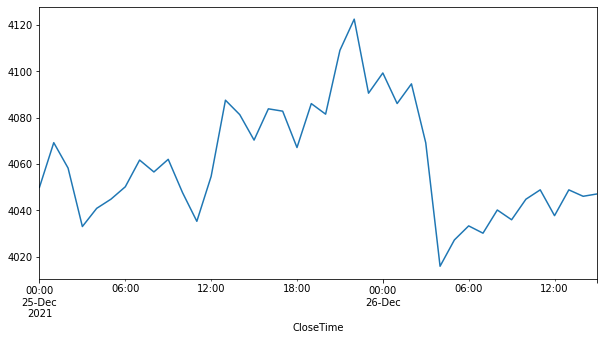

In [16]:
eth["ClosePrice"].plot(figsize=(10, 5))

## Exporting the data to an .xlsx file

In [18]:
with pd.ExcelWriter("my_crypto.xlsx") as writer:
  btc.to_excel(writer, sheet_name="Bitcoin")
  eth.to_excel(writer, sheet_name="Ether")